In [1]:
from visual_behavior.visualization.qc import session_plots as sp
from visual_behavior.visualization.qc import container_plots as cp
from visual_behavior.visualization.qc import data_loading as dl
import visual_behavior.utilities as vbu
import matplotlib.pyplot as plt
import pandas as pd

from visual_behavior.translator.foraging2 import data_to_change_detection_core
from visual_behavior.translator.core import create_extended_dataframe
from visual_behavior.change_detection.trials import summarize
import visual_behavior.database as db

%widescreen

/home/dougo/Code/AllenSDK/allensdk/brain_observatory/behavior/behavior_ophys_api/behavior_ophys_nwb_api.py:9: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
def get_session_stats(behavior_session_uuid):
    vb = db.Database('visual_behavior_data')
    stats = vb.behavior_data['summary'].find_one({'behavior_session_uuid':behavior_session_uuid})
    vb.close()
    return stats

def get_value(behavior_session_uuid, value):
    session_stats = get_session_stats(behavior_session_uuid)
    return session_stats[value]

def oeid_to_uuid(oeid):
    return db.convert_id({'ophys_experiment_id':oeid},'behavior_session_uuid')

In [12]:
table = dl.get_filtered_ophys_experiment_table()
ophys_experiment_ids = table.query('container_id == {}'.format(ophys_container_id)).sort_values(by='date_of_acquisition')['ophys_experiment_id']

In [13]:
table.query('container_id == {} and ophys_experiment_id == {}'.format(ophys_container_id,)).sort_values(by='date_of_acquisition')

,ophys_experiment_id,ophys_session_id,behavior_session_id,container_id,project_code,container_workflow_state,experiment_workflow_state,session_name,session_type,equipment_name,date_of_acquisition,isi_experiment_id,specimen_id,sex,age_in_days,full_genotype,reporter_line,driver_line,imaging_depth,targeted_structure,published_at,super_container_id,cre_line,session_tags,failure_tags,exposure_number,location
1777,839716149,839208243,839240915,1016840755,VisualBehaviorMultiscope,holding,passed,20190319_431151_stim1,OPHYS_1_images_A,MESO.1,2019-03-19 13:23:48.000000,804715932,791871803,M,144.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],150,VISl,NaN,791871803,Vip-IRES-Cre,mesoscope_pilot_datacube,NaN,0,Vip_VISl_150
1788,840460378,839514418,839557830,1016840755,VisualBehaviorMultiscope,holding,passed,20190320_431151_Images2,OPHYS_2_images_A_passive,MESO.1,2019-03-20 10:43:08.000000,804715932,791871803,M,145.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],150,VISl,NaN,791871803,Vip-IRES-Cre,mesoscope_pilot_datacube,NaN,0,Vip_VISl_150
1795,840717538,840490733,840584709,1016840755,VisualBehaviorMultiscope,holding,passed,20190322_431151_Ophys3,OPHYS_3_images_A,MESO.1,2019-03-22 12:14:14.000000,804715932,791871803,M,147.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],150,VISl,NaN,791871803,Vip-IRES-Cre,mesoscope_pilot_datacube,NaN,0,Vip_VISl_150
1780,841969467,841778484,841850052,1016840755,VisualBehaviorMultiscope,holding,passed,20190326_431151_5imagesBpassive,OPHYS_5_images_B_passive,MESO.1,2019-03-26 11:45:59.000000,804715932,791871803,M,151.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],150,VISl,NaN,791871803,Vip-IRES-Cre,mesoscope_pilot_datacube,parent_averaged_depth_image_7,0,Vip_VISl_150
1770,842545444,842364341,842426552,1016840755,VisualBehaviorMultiscope,holding,passed,20190327_431151_6imagesB,OPHYS_6_images_B,MESO.1,2019-03-27 12:35:33.000000,804715932,791871803,M,152.0,Vip-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,[Ai148(TIT2L-GC6f-ICL-tTA2)],[Vip-IRES-Cre],150,VISl,NaN,791871803,Vip-IRES-Cre,mesoscope_pilot_datacube,NaN,0,Vip_VISl_150


saving


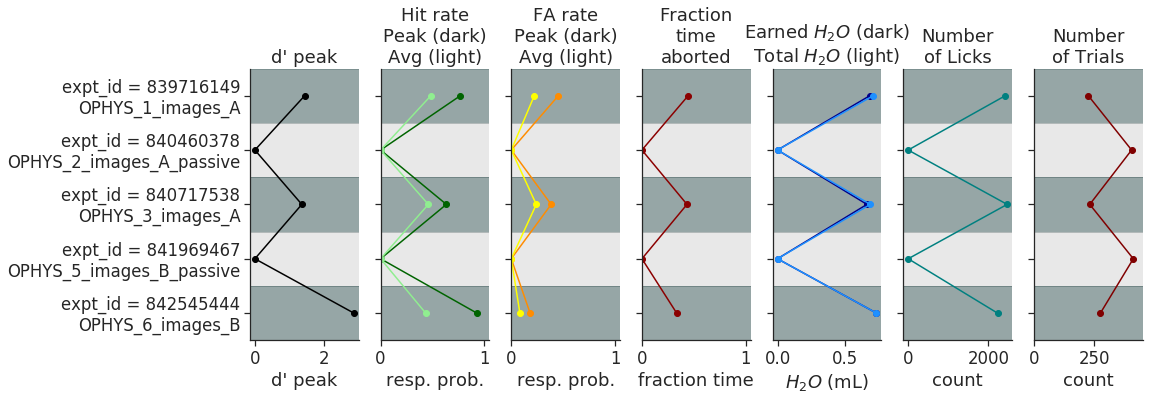

In [5]:
def plot_behavior_summary(ophys_container_id, save_figure=True):
    table = dl.get_filtered_ophys_experiment_table()
    ophys_experiment_ids = table.query('container_id == {}'.format(ophys_container_id)).sort_values(by='date_of_acquisition')['ophys_experiment_id']

    vals_to_plot = {
        'd_prime_peak':[],
        'hit_rate_peak':[],
        'hit_rate':[],
        'false_alarm_rate_peak':[],
        'false_alarm_rate':[],
        'fraction_time_aborted':[],
        'earned_water':[],
        'total_water':[],
        'number_of_licks':[],
        'num_contingent_trials':[],
    }

    fig,ax=plt.subplots(1,7,figsize=(16,5),sharey=True)
    y_labels = []

    for ii,oeid in enumerate(ophys_experiment_ids):
        uuid = oeid_to_uuid(oeid)
        y_labels.append('expt_id = {}\n{}'.format(oeid,get_value(uuid, 'stage')))
        for key in vals_to_plot.keys():
            vals_to_plot[key].append(get_value(uuid, key))


    ax[0].set_ylim(-0.5,len(ophys_experiment_ids)-0.5)
    ax[0].invert_yaxis()
    ax[0].plot(vals_to_plot['d_prime_peak'],range(len(ophys_experiment_ids)),color='black',marker='o')
    ax[0].set_yticks(range(len(ophys_experiment_ids)))
    ax[0].set_yticklabels(y_labels);
    ax[0].set_xlabel("d' peak")
    ax[0].set_title("d' peak")

    ax[1].plot(vals_to_plot['hit_rate_peak'],range(len(ophys_experiment_ids)),color='darkgreen',marker='o')
    ax[1].plot(vals_to_plot['hit_rate'],range(len(ophys_experiment_ids)),color='lightgreen',marker='o')
    ax[1].set_title("Hit rate\nPeak (dark)\nAvg (light)")
    ax[1].set_xlabel('resp. prob.')
    ax[1].set_xlim(0,1.05)

    ax[2].plot(vals_to_plot['false_alarm_rate_peak'],range(len(ophys_experiment_ids)),color='darkorange',marker='o')
    ax[2].plot(vals_to_plot['false_alarm_rate'],range(len(ophys_experiment_ids)),color='yellow',marker='o')
    ax[2].set_title("FA rate\nPeak (dark)\nAvg (light)")
    ax[2].set_xlabel('resp. prob.')
    ax[2].set_xlim(0,1.05)

    ax[3].plot(vals_to_plot['fraction_time_aborted'],range(len(ophys_experiment_ids)),color='darkred',marker='o')
    ax[3].set_title("Fraction\ntime\naborted")
    ax[3].set_xlabel('fraction time')
    ax[3].set_xlim(0,1.05)

    ax[4].plot(vals_to_plot['earned_water'],range(len(ophys_experiment_ids)),color='darkblue',marker='o')
    ax[4].plot(vals_to_plot['total_water'],range(len(ophys_experiment_ids)),color='dodgerblue',marker='o')
    ax[4].set_title("Earned $H_2$$O$ (dark)\nTotal $H_2$$O$ (light)")
    ax[4].set_xlabel('$H_2$$O$ (mL)')

    ax[5].plot(vals_to_plot['number_of_licks'],range(len(ophys_experiment_ids)),color='teal',marker='o')
    ax[5].set_title("Number\nof Licks")
    ax[5].set_xlabel('count')

    ax[6].plot(vals_to_plot['num_contingent_trials'],range(len(ophys_experiment_ids)),color='Maroon',marker='o')
    ax[6].set_title("Number\nof Trials")
    ax[6].set_xlabel('count')
    ax[6].set_xlim(0,450)

    colors = ['DarkSlateGray','lightgray']
    for row in range(len(ophys_experiment_ids)):
        color = colors[row%2]
        for col in range(len(ax)):
            ax[col].axhspan(row-0.5,row+0.5,color=color,alpha=0.5)

    if save_figure:
        print('saving')
        save_folder = os.path.join(dl.get_container_plots_dir(), 'behavior_metric_summary')
        if os.path.exists(save_folder) == False:
            os.mkdir(save_folder)
        savepath = os.path.join(save_folder, 'container_{}.png'.format(ophys_container_id))
        fig.savefig(savepath, dpi=300, pad_inches=0.0, bbox_inches='tight')
        
ophys_container_id = 1016840755
plot_behavior_summary(ophys_container_id, save_figure=True)

saving


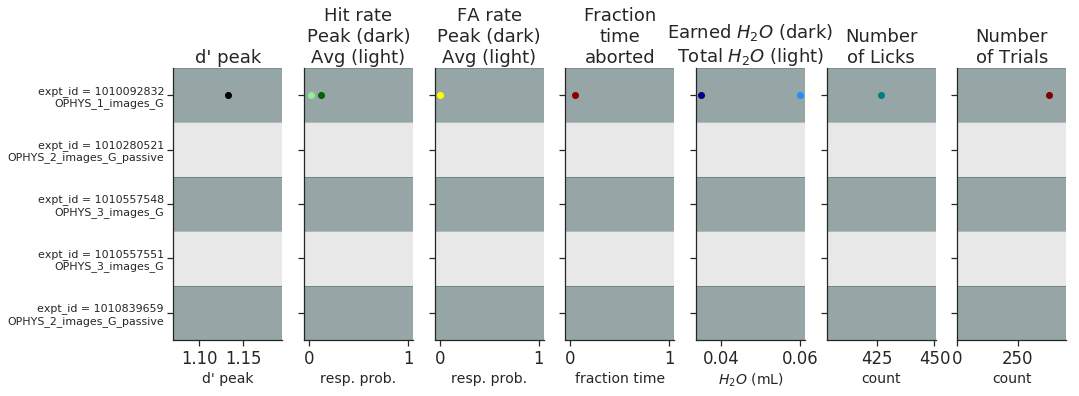

In [23]:
cp.plot_behavior_summary(1016840635, save_figure=True)

saving


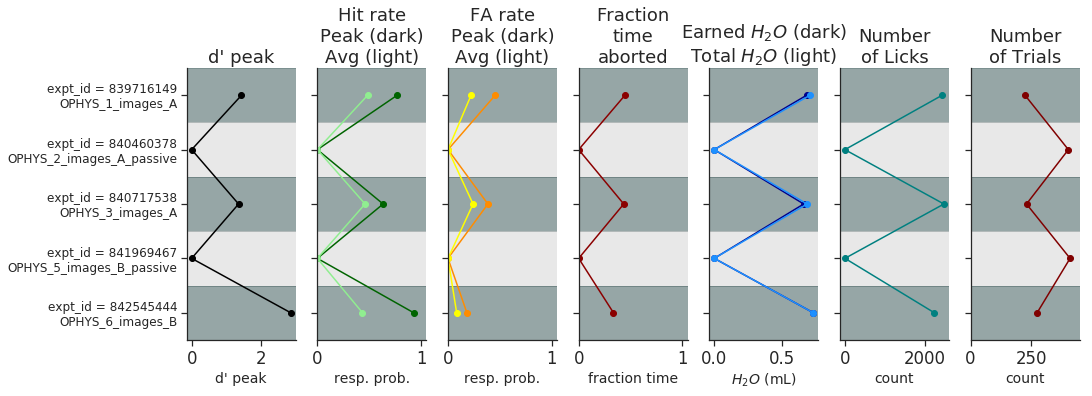

In [18]:
cp.plot_behavior_summary(ophys_container_id, save_figure=True)

In [44]:
vals_to_plot = {
        'd_prime_peak':[],
        'hit_rate_peak':[],
        'hit_rate':[],
        'false_alar_rate_peak':[],
        'false_alarm_rate':[],
        'fraction_time_aborted':[],
        'earned_water':[],
        'total_water':[],
        'number_of_licks':[],
        'num_contingent_trials':[],
    }

In [46]:
for k in vals_to_plot.keys():
    print(k)

d_prime_peak
hit_rate_peak
hit_rate
false_alar_rate_peak
false_alarm_rate
fraction_time_aborted
earned_water
total_water
number_of_licks
num_contingent_trials


OneResultExpectedError: 

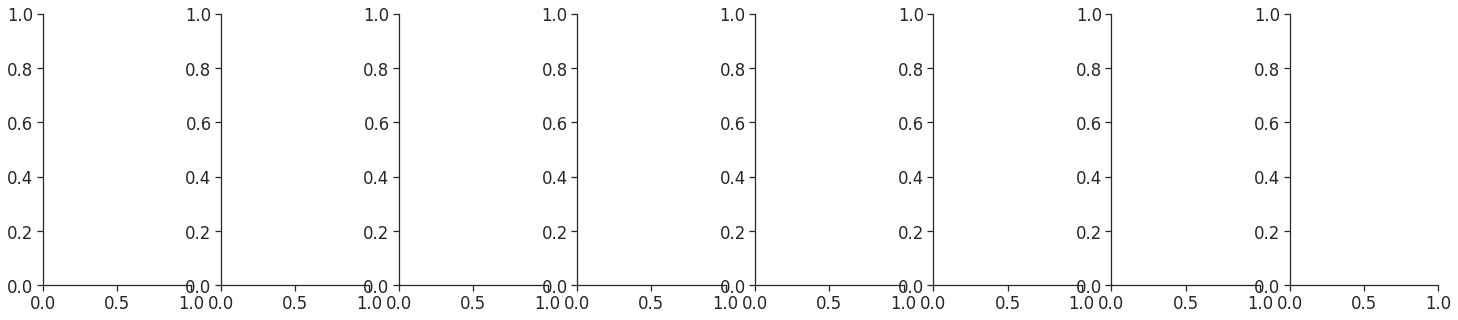

In [29]:
cp.plot_sdk_average_images_for_container(1016840685, save_figure=True)

In [ ]:
%debug

> /home/dougo/Code/AllenSDK/allensdk/internal/api/__init__.py(48)fetchone()
     46         response = one(list(self.select(query).to_dict().values()))
     47         if strict is True and (len(response) != 1 or response[0] is None):
---> 48             raise OneResultExpectedError
     49         return response[0]
     50 

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/internal/api/ophys_lims_api.py(215)get_dff_file()
    213                 WHERE oe.id= {};
    214                 '''.format(self.get_ophys_experiment_id())
--> 215         return safe_system_path(self.lims_db.fetchone(query, strict=True))
    216 
    217     @memoize

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/api/cache.py(75)wrapper()
     73         if result is not sentinel:
     74             return result
---> 75         result = f(*args, **kwargs)
     76         cache[key] = result
     77         return result

ipdb> u
> /home/dougo/Code/AllenSDK/allensdk/internal/api/ophys_lims_api.py(287)get_raw_dff_dat

ipdb> ophys_experiment_id
951980477


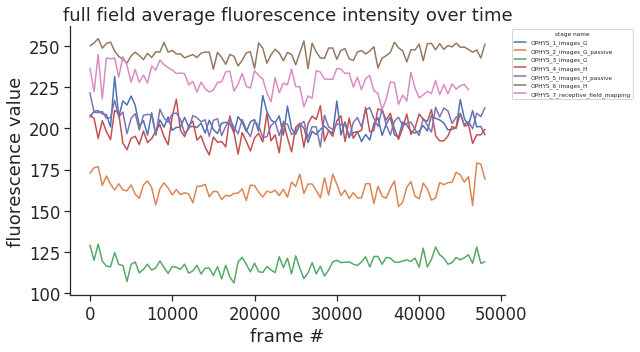

In [28]:
cp.plot_average_intensity_timeseries_for_container(1016840152)

In [27]:
%debug

> /home/dougo/Code/visual_behavior_analysis/visual_behavior/visualization/qc/experiment_plots.py(123)plot_average_intensity_timeseries_for_experiment()
    121         fig, ax = plt.subplots()
    122     ax.plot(frame_numbers, average_intensity,
--> 123             color=exp_stage_color_dict[ophys_experiment_id],
    124             label=experiment_df["stage_name_lims"][0])
    125     ax.set_ylabel('fluorescence value')

ipdb> exp_stage_color_dict.keys()
dict_keys([None])
ipdb> ophys_experiment_id
1006562227
ipdb> experiment_df
   ophys_experiment_id workflow_state  ophys_session_id  ophys_container_id  \
0           1006562227         passed        1006424352          1016840152   

         date_of_acquisition   stage_name_lims experiment_workflow_state  \
0 2020-02-11 13:55:33.130051  OPHYS_1_images_G                    passed   

   mouse_donor_id targeted_structure  depth     rig  mouse_id  \
0       958769021              VISam    175  MESO.1    489065   

            full_gen